In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:\\datasets\\insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
lab1 = le.fit_transform(df["sex"])
lab2 = le.fit_transform(df["region"])
lab3 = le.fit_transform(df["smoker"])


In [10]:
lab1


array([0, 1, 1, ..., 0, 0, 0])

In [11]:
lab2

array([3, 2, 2, ..., 2, 3, 1])

In [12]:
lab3

array([1, 0, 0, ..., 0, 0, 1])

In [13]:
data = df.drop("sex", axis="columns")


In [14]:

data = df.drop("region",axis="columns")

In [15]:
data = df.drop("smoker",axis="columns")

In [16]:
data

,age,sex,bmi,children,region,charges
0,19,female,27.900,0,southwest,16884.92400
1,18,male,33.770,1,southeast,1725.55230
2,28,male,33.000,3,southeast,4449.46200
3,33,male,22.705,0,northwest,21984.47061
4,32,male,28.880,0,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830
1334,18,female,31.920,0,northeast,2205.98080
1335,18,female,36.850,0,southeast,1629.83350
1336,21,female,25.800,0,southwest,2007.94500


In [17]:
data["sex"] = lab1
data["region"] = lab2
data["smoker"] = lab3

In [18]:
data

,age,sex,bmi,children,region,charges,smoker
0,19,0,27.900,0,3,16884.92400,1
1,18,1,33.770,1,2,1725.55230,0
2,28,1,33.000,3,2,4449.46200,0
3,33,1,22.705,0,1,21984.47061,0
4,32,1,28.880,0,1,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0
1334,18,0,31.920,0,0,2205.98080,0
1335,18,0,36.850,0,2,1629.83350,0
1336,21,0,25.800,0,3,2007.94500,0


Text(0.5, 1.0, 'Distribution of charges')

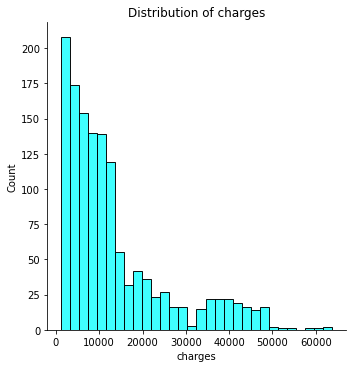

In [19]:

sns.displot(data, x="charges", color = 'cyan')
plt.title("Distribution of charges")

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


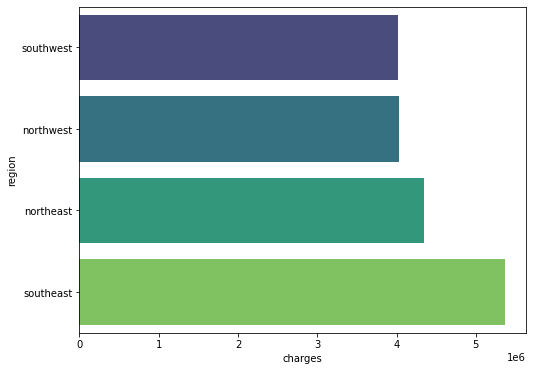

In [20]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='viridis')


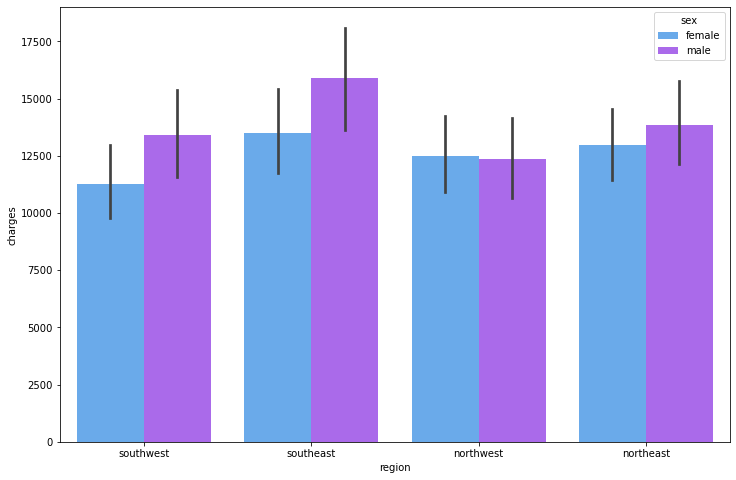

In [21]:
grp = plt.subplots(1,1, figsize=(12,8))
grp = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

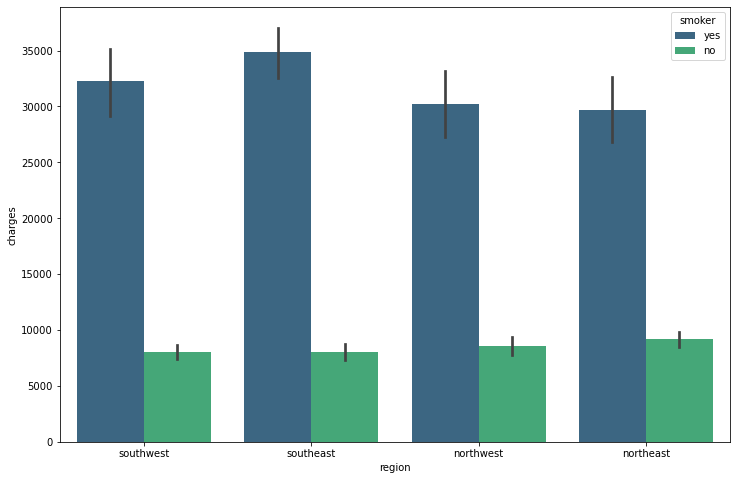

In [22]:
grp = plt.subplots(1,1, figsize=(12,8))
grp = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='viridis')

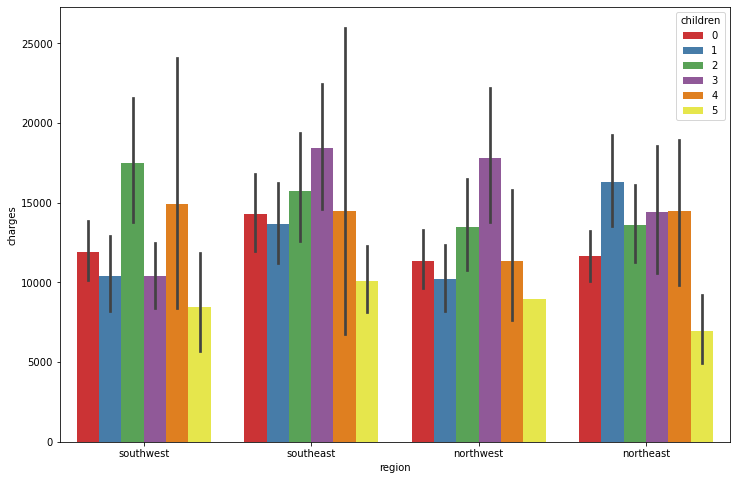

In [23]:
grp = plt.subplots(1, 1, figsize=(12, 8))
grp = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

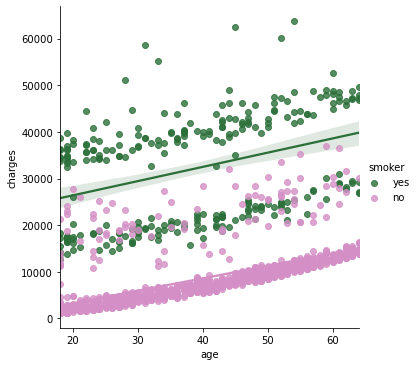

In [24]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='cubehelix')


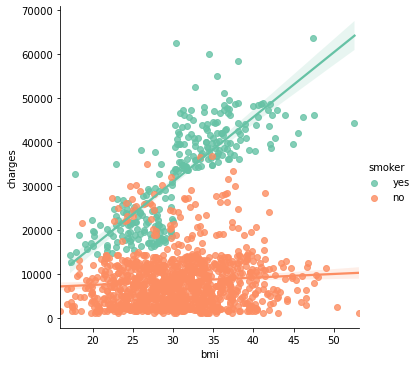

In [25]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')


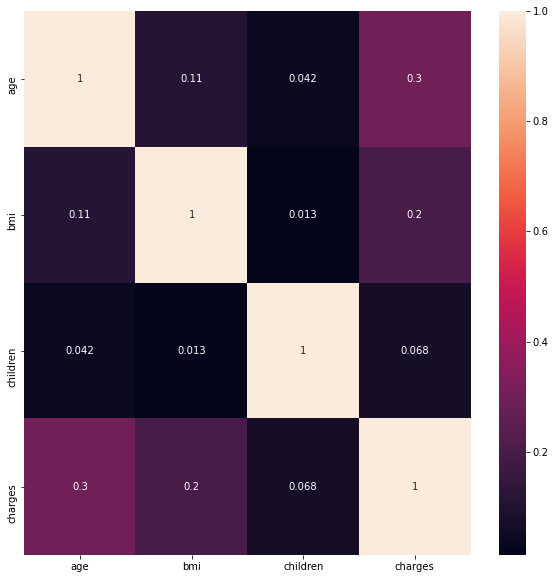

In [26]:
grp= plt.subplots(1, 1, figsize=(10, 10))
grp = sns.heatmap(df.corr(), annot=True)



In [27]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression



In [28]:
x = data.drop(['charges'], axis = 1)
y = data['charges']

In [29]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)


LinearRegression()

In [30]:
print(Lin_reg.intercept_)



-11661.983908824432


In [31]:
print(Lin_reg.coef_)

[  253.99185244   -24.32455098   328.40261701   443.72929547
  -288.50857254 23568.87948381]


In [1]:
print(Lin_reg.score(x_test, y_test))

NameError: name 'Lin_reg' is not defined